***TITANIC SURVIVAL PREDICTION***

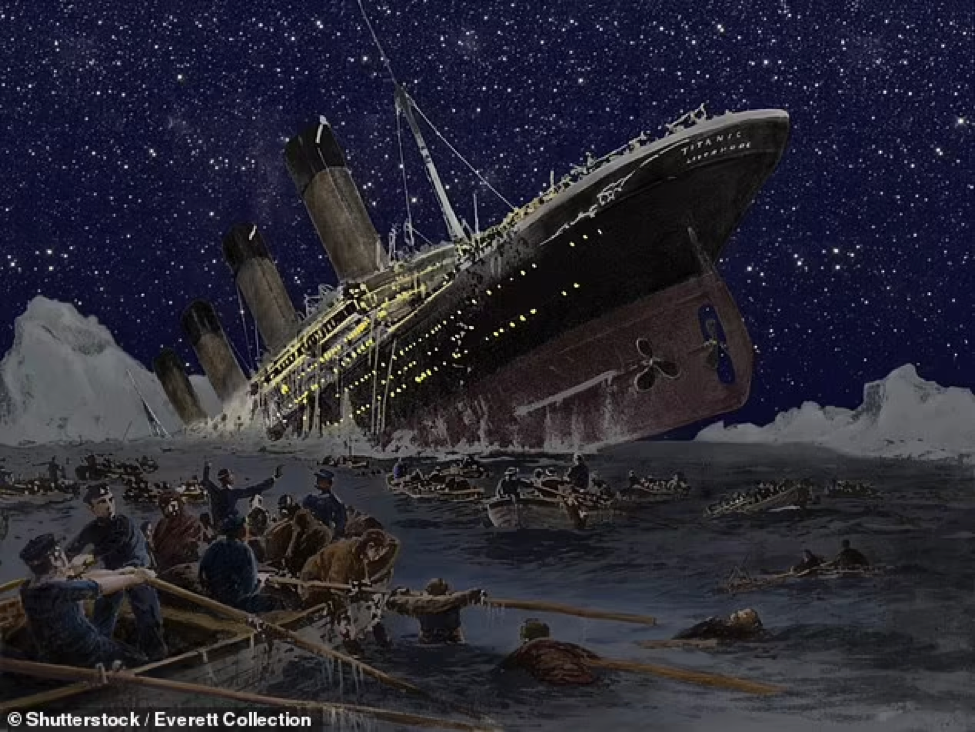

**Importing the Dependenciest**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Setting Data Path**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/tested.csv")

In [8]:
# printing the first 5 rows of the dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# getting some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [10]:
# number of rows and Columns
df.shape

(418, 12)

In [11]:
## check the number of missing values in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Handling the Missing values**

In [12]:
# drop the "Cabin" column from the dataframe
df =df.drop(columns='Cabin', axis=1)

In [13]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [14]:
# finding the mode value of "Fare" column
print(df['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [15]:
print(df['Fare'].mode()[0])

7.75


In [16]:
# replacing the missing values in Fare" column with mode value
df['Fare'].fillna(df['Fare'].mode()[0], inplace=True)

In [17]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

***Data Analysis***

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

***Data Visualization***

In [20]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

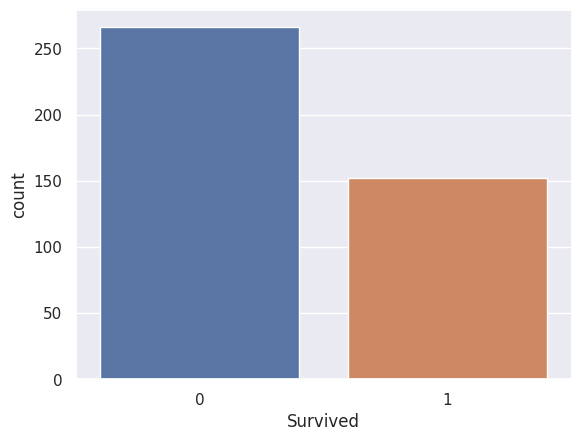

In [21]:
# making a count plot for "Survived" column
sns.countplot(x='Survived', data=df)

In [22]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

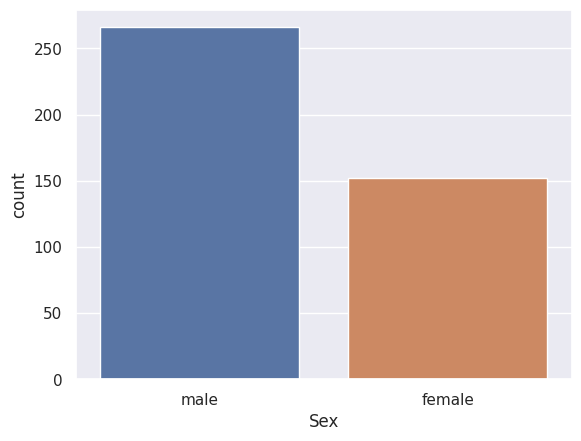

In [23]:
# making a count plot for "Sex" column
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

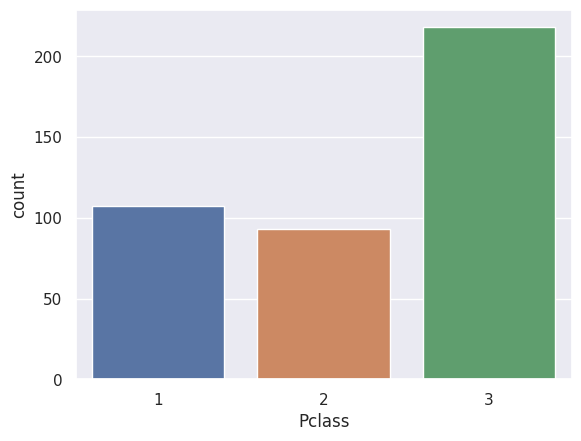

In [24]:
#making a count pot for "Pclass" colum
sns.countplot(x ='Pclass', data = df)

<Axes: xlabel='Pclass', ylabel='count'>

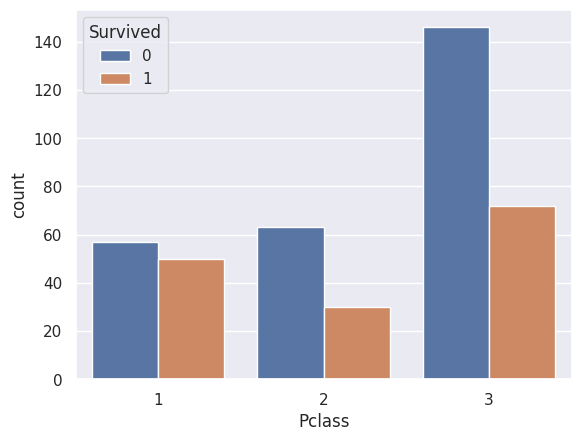

In [25]:
sns.countplot(x="Pclass", hue='Survived', data = df)

<Axes: xlabel='Embarked', ylabel='count'>

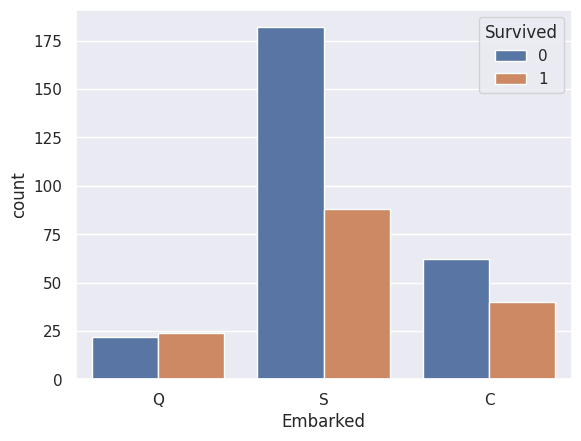

In [26]:
sns.countplot(x="Embarked", hue='Survived', data = df)

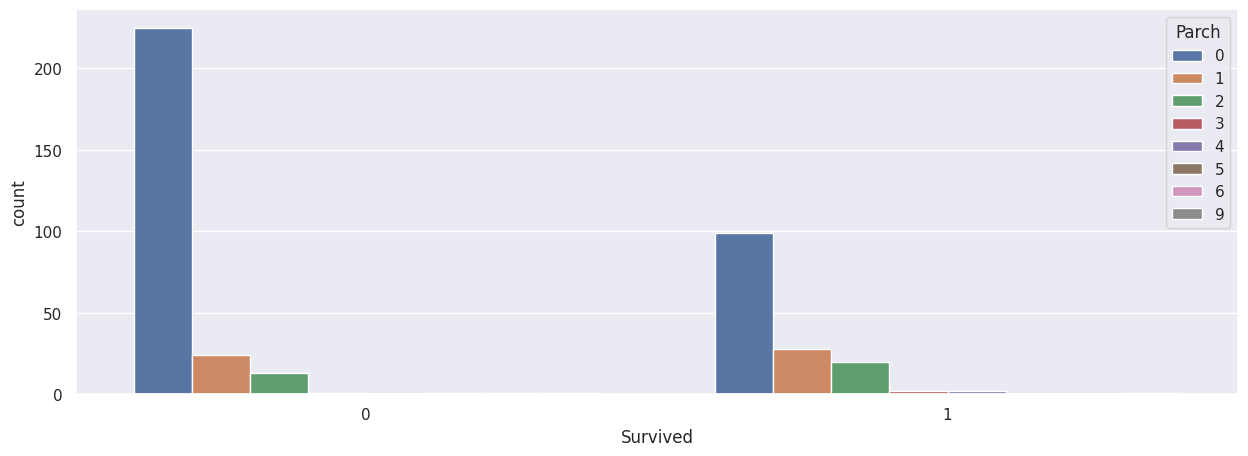

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='Survived', hue='Parch', data=df);

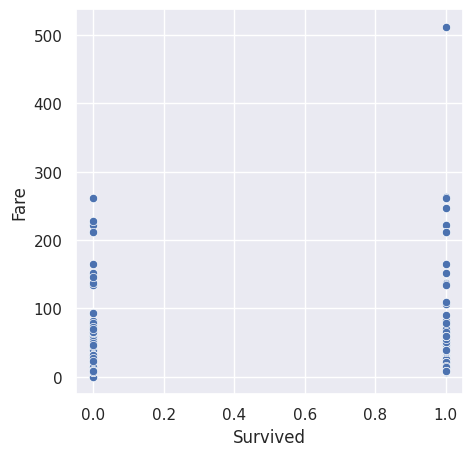

In [28]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Survived', y='Fare', data=df)
plt.show()

<ipython-input-29-b1ead6436c51>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corel=df.corr()


<Axes: >

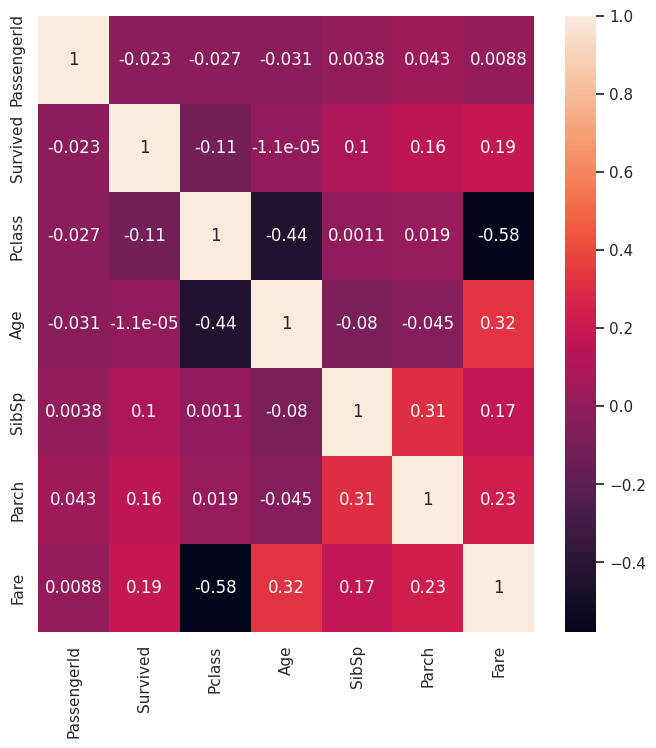

In [29]:
plt.figure(figsize=(8,8))#fig size
df_corel=df.corr()
sns.heatmap(df_corel,annot=True)

**Encoding the Categorical Columns**

In [30]:
#replacing male with 0 and female with 1 of column Sex in order to train our data
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [31]:
df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [32]:
#coverting to categorical columns
df.replace({'Sex':{'male':0,'female':1}, "Embarked":{'S':0,'C':1,'Q':2}},inplace=True)

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


**Separating features & Target**

In [34]:
X=df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=df['Survived']

In [35]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [36]:
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,  test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


***Model Training***


***Logistic Regression***

In [38]:
model= LogisticRegression()

In [39]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Model Evaluation***


***Accuracy Score***

In [40]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [41]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [42]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [43]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


# Thank You